In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/week6/Classification Datsets/Classification Datsets/Loan_Default/Classification_Loan_Default (1).csv')

In [5]:
df.shape

(22300, 33)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,0,122508,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,1U,2400.0,EQUI,820,EXP,NaN,to_inst,NaN,direct,1
1,1,25685,50575,cf,Male,nopre,type1,p3,l1,nopc,...,1U,11160.0,CRIF,523,CIB,NaN,not_inst,80.292479,direct,1
2,2,63991,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,...,1U,NaN,EXP,832,CIB,47.0,to_inst,82.035176,direct,0
3,3,144321,169211,ncf,Female,pre,type1,p3,l1,nopc,...,1U,8700.0,CRIF,847,CIB,54.0,to_inst,59.365443,direct,1
4,4,37842,62732,cf,Joint,nopre,type2,p3,l2,nopc,...,1U,12180.0,CIB,573,EXP,53.0,not_inst,84.251412,direct,0


In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'loan_limit', 'Gender',
       'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness',
       'open_credit', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'Age', 'submission_of_application', 'LTV',
       'Security_Type', 'Status'],
      dtype='object')

Unnamed: 0.1 and Unnamed: 0: These columns are likely duplicates of the index column and can be ignored for analysis purposes.

ID: A unique identifier for each loan.

loan_limit: The maximum amount of money that the borrower can borrow.

Gender: The gender of the borrower.

approv_in_adv: A binary variable indicating whether the loan was approved in advance or not.

loan_type: The type of loan, such as mortgage, auto loan, or personal loan.

loan_purpose: The purpose of the loan, such as debt consolidation, home improvement, or education.

Credit_Worthiness: A rating assigned to the borrower based on their creditworthiness.

open_credit: The number of open credit accounts the borrower has.

business_or_commercial: A binary variable indicating whether the loan is for a business or commercial purpose.

loan_amount: The amount of money being borrowed.

rate_of_interest: The annual interest rate charged on the loan.

Interest_rate_spread: The difference between the loan's interest rate and the benchmark rate.
Upfront_charges: Any upfront fees or charges associated with the loan.

term: The length of time over which the loan will be repaid.

Neg_ammortization: A binary variable indicating whether the loan has negative amortization (i.e., the loan balance can increase over time).

interest_only: A binary variable indicating whether the loan has an interest-only payment period.

lump_sum_payment: A binary variable indicating whether the borrower can make lump sum payments on the loan.

property_value: The value of the property being used as collateral for the loan.

construction_type: The type of construction of the property being used as collateral.

occupancy_type: The type of occupancy of the property being used as collateral.

Secured_by: The asset(s) being used as collateral for the loan.

total_units: The total number of units in the property being used as collateral.

income: The borrower's income.

credit_type: The type of credit account, such as revolving credit or installment credit.

Credit_Score: The borrower's credit score.

co-applicant_credit_type: The type of credit account held by any co-applicant on the loan.

Age: The borrower's age.
submission_of_application: A binary variable indicating whether the loan application was submitted online or in person.

LTV: The loan-to-value ratio, which is the ratio of the loan amount to the value of the property being used as collateral.

Security_Type: The type of security being used to secure the loan.

In [8]:
df.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
ID                              0
loan_limit                    496
Gender                          0
approv_in_adv                 137
loan_type                       0
loan_purpose                   18
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5423
Interest_rate_spread         5460
Upfront_charges              5886
term                            3
Neg_ammortization              25
interest_only                   0
lump_sum_payment                0
property_value               2231
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       1310
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
Age                            19
submission_of_

In [9]:
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
count,22300.000000,22300.000000,22300.000000,21804,22300,22163,22300,22282,22300,22300,...,22300,20990.000000,22300,22300.000000,22300,22281.000000,22263,20069.000000,22300,22300.000000
unique,NaN,NaN,NaN,2,4,2,3,4,2,2,...,4,NaN,4,NaN,2,NaN,2,NaN,2,NaN
top,NaN,NaN,NaN,cf,Joint,nopre,type1,p3,l1,nopc,...,1U,NaN,CIB,NaN,EXP,NaN,to_inst,NaN,direct,NaN
freq,NaN,NaN,NaN,20364,6306,18678,16995,8467,21316,22209,...,21963,NaN,7246,NaN,11207,NaN,14274,NaN,22299,NaN
mean,11149.500000,74604.745202,99494.745202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6985.523583,NaN,700.354170,NaN,42.613797,NaN,72.772953,NaN,0.244843
std,6437.599837,42719.077600,42719.077600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6527.140125,NaN,116.185578,NaN,10.918767,NaN,57.953254,NaN,0.430004
min,0.000000,6.000000,24896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,500.000000,NaN,24.000000,NaN,0.967478,NaN,0.000000
25%,5574.750000,37859.250000,62749.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3720.000000,NaN,599.000000,NaN,33.000000,NaN,60.416667,NaN,0.000000
50%,11149.500000,75016.500000,99906.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5700.000000,NaN,701.000000,NaN,43.000000,NaN,75.082237,NaN,0.000000
75%,16724.250000,111718.250000,136608.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8580.000000,NaN,801.000000,NaN,52.000000,NaN,85.663842,NaN,0.000000


In [10]:
df.dtypes

Unnamed: 0.1                   int64
Unnamed: 0                     int64
ID                             int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
c

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               22300 non-null  int64  
 1   Unnamed: 0                 22300 non-null  int64  
 2   ID                         22300 non-null  int64  
 3   loan_limit                 21804 non-null  object 
 4   Gender                     22300 non-null  object 
 5   approv_in_adv              22163 non-null  object 
 6   loan_type                  22300 non-null  object 
 7   loan_purpose               22282 non-null  object 
 8   Credit_Worthiness          22300 non-null  object 
 9   open_credit                22300 non-null  object 
 10  business_or_commercial     22300 non-null  object 
 11  loan_amount                22300 non-null  int64  
 12  rate_of_interest           16877 non-null  float64
 13  Interest_rate_spread       16840 non-null  flo

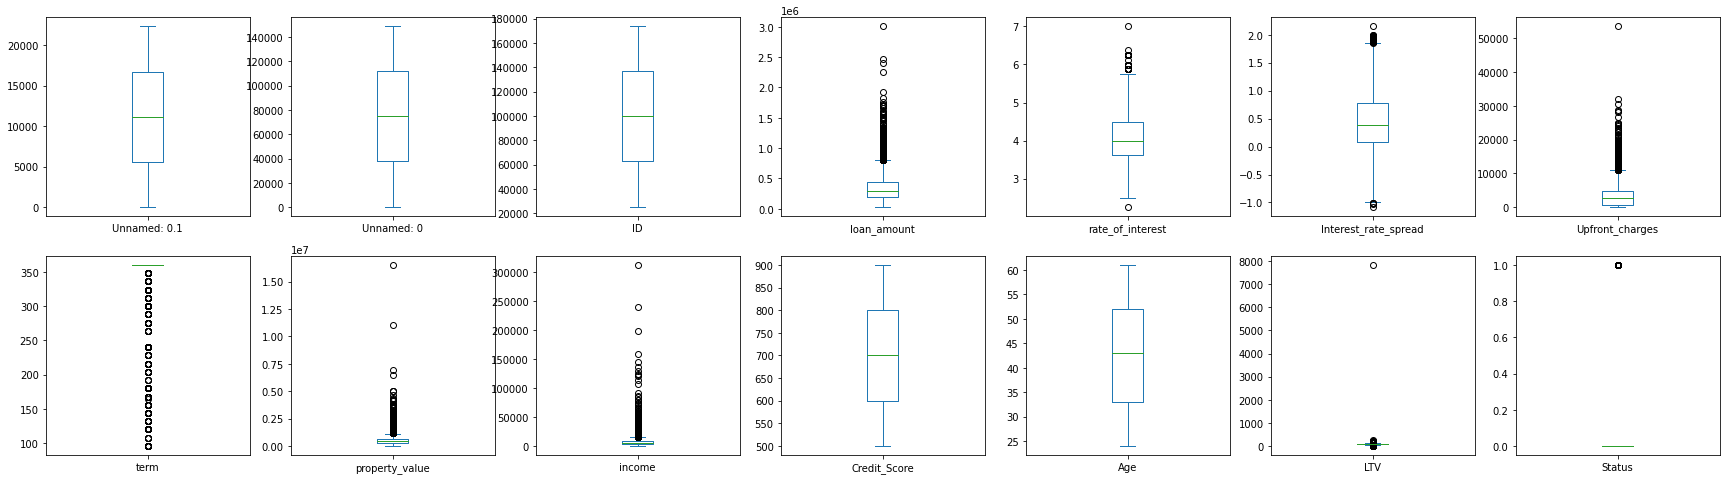

In [12]:
df.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()
     

In [13]:
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
dataset_train = df[(df['loan_amount'] >= Q1 - 1.5*IQR) & (df['loan_amount'] <= Q3 + 1.5*IQR)]

In [14]:
Q1 = df['rate_of_interest'].quantile(0.25)
Q3 = df['rate_of_interest'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
dataset_train = df[(df['rate_of_interest'] >= Q1 - 1.5*IQR) & (df['rate_of_interest'] <= Q3 + 1.5*IQR)]

In [15]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Categorical variables: 19
Integer variables: 6


In [16]:
df.nunique()

Unnamed: 0.1                 22300
Unnamed: 0                   22300
ID                           22300
loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    156
rate_of_interest                88
Interest_rate_spread         10938
Upfront_charges              10691
term                            23
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 259
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                         593
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
Age                 

In [17]:
df=df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,...,1U,2400.0,EQUI,820,EXP,NaN,to_inst,NaN,direct,1
1,50575,cf,Male,nopre,type1,p3,l1,nopc,nob/c,576500,...,1U,11160.0,CRIF,523,CIB,NaN,not_inst,80.292479,direct,1
2,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,nob/c,326500,...,1U,NaN,EXP,832,CIB,47.0,to_inst,82.035176,direct,0
3,169211,ncf,Female,pre,type1,p3,l1,nopc,nob/c,776500,...,1U,8700.0,CRIF,847,CIB,54.0,to_inst,59.365443,direct,1
4,62732,cf,Joint,nopre,type2,p3,l2,nopc,b/c,596500,...,1U,12180.0,CIB,573,EXP,53.0,not_inst,84.251412,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,71837,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,296500,...,1U,2820.0,EXP,880,EXP,37.0,to_inst,48.766447,direct,0
22296,118626,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,1U,3900.0,CIB,730,CIB,41.0,not_inst,67.857143,direct,0
22297,66743,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,226500,...,1U,3480.0,CIB,676,CIB,50.0,to_inst,76.006711,direct,0
22298,47746,cf,Male,nopre,type2,p1,l1,nopc,b/c,226500,...,1U,5340.0,EXP,844,CIB,51.0,not_inst,91.330645,direct,0


In [18]:
cat = (['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'submission_of_application',
       'Security_Type'])

In [19]:
cat1=np.array(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'submission_of_application',
       'Security_Type'])
for cat in cat1:
    df[cat] =  df[cat].fillna(df[cat].mode()[0])
    

In [20]:
num = (['loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'Age', 'LTV', 'Status'])
for num_col in num:
    df[num_col]=df[num_col].fillna(df[num_col].median())

In [21]:
df.isnull().sum()

ID                           0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
Age                          0
submission_of_application    0
LTV                          0
Security_Type                0
Status                       0
dtype: int64

In [22]:
cat=df.drop(num,axis=1)
cat.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,submission_of_application,Security_Type
0,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,to_inst,direct
1,50575,cf,Male,nopre,type1,p3,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,CRIF,CIB,not_inst,direct
2,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,to_inst,direct
3,169211,ncf,Female,pre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,CIB,to_inst,direct
4,62732,cf,Joint,nopre,type2,p3,l2,nopc,b/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,EXP,not_inst,direct


In [23]:
df['loan_limit'].unique() 

array(['cf', 'ncf'], dtype=object)

In [24]:
df['Gender'].unique()

array(['Sex Not Available', 'Male', 'Female', 'Joint'], dtype=object)

In [25]:
df['approv_in_adv'].unique()

array(['nopre', 'pre'], dtype=object)

In [26]:
df['Status'].unique()

array([1, 0])

In [27]:
 df = df.drop(['ID','property_value','submission_of_application'],axis=1)

In [28]:
cat.columns

Index(['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type',
       'submission_of_application', 'Security_Type'],
      dtype='object')

In [29]:

# Convert categorical columns into dummy variables
cat_cols = (['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type',
       'Security_Type'])
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(columns=cat_cols, inplace=True)

# Print the updated dataframe
df.head()


,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,income,Credit_Score,Age,LTV,Status,...,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,Security_Type_direct
0,166500,3.990,0.3859,2587.89,360.0,2400.0,820,43.0,75.082237,1,...,0,0,0,0,0,0,1,0,1,1
1,576500,3.990,0.3859,2587.89,360.0,11160.0,523,43.0,80.292479,1,...,0,0,0,0,0,1,0,0,0,1
2,326500,3.990,0.2570,0.00,360.0,5700.0,832,47.0,82.035176,0,...,0,0,0,0,0,0,0,1,0,1
3,776500,3.990,0.3859,2587.89,360.0,8700.0,847,54.0,59.365443,1,...,0,0,0,0,0,1,0,0,0,1
4,596500,4.625,1.0186,0.00,360.0,12180.0,573,53.0,84.251412,0,...,0,0,0,0,0,0,0,0,1,1


In [30]:
df.shape

(22300, 38)

In [31]:

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [32]:
num = (['loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term',
       'income', 'Credit_Score', 'Age', 'LTV'])
X_train_num = df[num]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train_num)

# Scale the numerical features in the training set
df[num] = scaler.transform(X_train_num)


In [33]:
# Separate the target variable from the input features
y = df['Status']
X = df.drop('Status', axis=1) #axis=1 the operation is performed along the columns

In [34]:
# Split the data into training and test sets
train_size = int(len(df) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 15609
test data: 6691


In [35]:
X_train.shape

(15609, 37)

In [36]:
y_train.shape

(15609,)

In [37]:
y_train.head()

0    1
1    1
2    0
3    1
4    0
Name: Status, dtype: int64

In [38]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()


In [39]:
class NeuralNetwork:
    def __init__(self, num_features):
        self.weights1 = np.random.rand(10, num_features)
        self.weights2 = np.random.rand(1, 10)
  

    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1.T))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2.T))
        return self.output_layer
    
    def train(self, X_train, y_train, lr, epochs):
        y_train = y_train.values.reshape(-1, 1)  # convert to numpy array and reshape
        for i in range(epochs):
            # forward propagation
            output = self.forward(X_train)

            # calculate error
            error = y_train - output

            # backpropagation
            output_derivative = output * (1 - output)
            hidden_layer_derivative = self.hidden_layer * (1 - self.hidden_layer)
            delta2 = error * output_derivative
            delta1 = np.dot(delta2, self.weights2) * hidden_layer_derivative

            # update weights
            self.weights2 += lr * np.dot(delta2.T, self.hidden_layer)
            self.weights1 += lr * np.dot(delta1.T, X_train)



In [40]:
nn = NeuralNetwork(num_features=37)
nn.train(X_train, y_train, lr=0.01, epochs=100)

In [41]:
y_pred = nn.forward(X_train)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary == y_train.values.reshape(-1, 1))
print('Train accuracy:', accuracy)

Train accuracy: 0.728810301748991


In [43]:
y_pred_t = nn.forward(X_test)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary_t = np.where(y_pred_t >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary_t == y_test.values.reshape(-1, 1))
print('Test accuracy:', accuracy)

Test accuracy: 0.7223135555223434


In [44]:
# assume X_test and y_test are the test dataset and labels
# predict labels using traine

# create confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    true_label = int(y_test.iloc[i])
    predicted_label = int(y_pred_binary_t[i][0])
    confusion_matrix[true_label][predicted_label] += 1

# print confusion matrix
print("Confusion matrix:")
print(confusion_matrix)


Confusion matrix:
[[3351. 1752.]
 [ 106. 1482.]]


In [45]:
import itertools

# define hyperparameters and their possible values to try out
learning_rates = [0.1, 0.01, 0.001]
epochs = [100,200,300]
hidden_layer_sizes = [40, 45, 30]

# create a list of all possible hyperparameter combinations
hyperparameter_combinations = list(itertools.product(learning_rates, epochs, hidden_layer_sizes))

# initialize variables to keep track of best hyperparameters and best accuracy
best_hyperparameters = None
best_accuracy = 0

# loop over all possible hyperparameter combinations
for lr, epoch, hidden_layer_size in hyperparameter_combinations:
    # train model with current hyperparameters
    nn = NeuralNetwork(num_features=37)
    nn.train(X_train, y_train, lr=lr, epochs=epoch)
    
    # make predictions on train data
    y_pred = nn.forward(X_train)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

    # calculate accuracy
    accuracy = np.mean(y_pred_binary == y_train.values.reshape(-1, 1))
    # make predictions on test data
    y_pred_t = nn.forward(X_test)
    y_pred_binary = np.where(y_pred_t >= 0.5, 1, 0)

    # calculate accuracy
    accuracy = np.mean(y_pred_binary_t == y_test.values.reshape(-1, 1))
    

    # if current accuracy is better than previous best, update best hyperparameters and best accuracy
    if accuracy > best_accuracy:
        best_hyperparameters = (lr, epoch, hidden_layer_size)
        best_accuracy = accuracy
    
print("Best hyperparameters:", best_hyperparameters)
print("Best test accuracy:", best_accuracy)
print("Best train accuracy:", best_accuracy)

Best hyperparameters: (0.1, 100, 40)
Best test accuracy: 0.7223135555223434
Best train accuracy: 0.7223135555223434
